In [14]:
import numpy as np
import pandas as pd
import scipy as sp

data_50 = []
for idx in range(1, 11):
    file_path = f"C:\\Users\\enmao\\OneDrive-CU\\mas thesis\\code\\simulation_data_50_{idx}.csv"
    #file_path = r"C:\Users\enmao\OneDrive-CU\mas thesis\code"
    data_50.append(pd.read_csv(file_path))
    

combined_50 = pd.concat(data_50)
combined_50.shape



(3000, 4)

In [5]:
import os
# Define constants
BASE_PATH = r"D:\mas\code"
COLUMNS = ['unemployment_rate', 'theta', 'profit', 'price']
NUM_FILES = 10

def process_csv_files():
    # Generate file paths
    file_paths = [os.path.join(BASE_PATH, f"simulation_data_50_{i+1}.csv") for i in range(NUM_FILES)]
    
    # Dictionary to store extracted columns
    extracted_data = {col: [] for col in COLUMNS}
    
    # Read and extract columns from each file
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        for col_idx, col_name in enumerate(COLUMNS):
            extracted_data[col_name].append(df.iloc[:, col_idx])
    
    # Combine and save extracted columns
    for col_name in COLUMNS:
        combined_df = pd.concat(extracted_data[col_name], axis=1)
        output_filename = f"extracted_{col_name.lower()}.csv"
        combined_df.to_csv(os.path.join(BASE_PATH, output_filename), index=False)
        print(f"Created {output_filename} with shape {combined_df.shape}")

if __name__ == "__main__":
    process_csv_files()

Created extracted_unemployment_rate.csv with shape (300, 10)
Created extracted_theta.csv with shape (300, 10)
Created extracted_profit.csv with shape (300, 10)
Created extracted_price.csv with shape (300, 10)


In [7]:
import os
# Define constants
BASE_PATH = r"D:\mas\code"

NUM_FILES = 10
dta_firm = [50, 100, 200, 1000]


def process_csv_files():
    # Generate file paths
    for firm in dta_firm:
        COLUMNS = [f'unemployment_rate_{firm}', f'theta_{firm}', f'revenue_{firm}', f'price_{firm}']
        file_paths[firm] = [os.path.join(BASE_PATH, f"simulation_data_{firm}_{i+1}.csv") for i in range(NUM_FILES)]
    
        # Dictionary to store extracted columns
        extracted_data = {col: [] for col in COLUMNS}

        # Read and extract columns from each file
        for file_path in file_paths[firm]:
            df = pd.read_csv(file_path)
            for col_idx, col_name in enumerate(COLUMNS):
                extracted_data[col_name].append(df.iloc[:, col_idx])

        # Combine and save extracted columns
        for col_name in COLUMNS:
            combined_df = pd.concat(extracted_data[col_name], axis=1)
            output_filename = f"extracted_{col_name.lower()}.csv"
            combined_df.to_csv(os.path.join(BASE_PATH, output_filename), index=False)
            print(f"Created {output_filename} with shape {combined_df.shape}")

if __name__ == "__main__":
    process_csv_files()

Created extracted_unemployment_rate_50.csv with shape (300, 10)
Created extracted_theta_50.csv with shape (300, 10)
Created extracted_revenue_50.csv with shape (300, 10)
Created extracted_price_50.csv with shape (300, 10)
Created extracted_unemployment_rate_100.csv with shape (300, 10)
Created extracted_theta_100.csv with shape (300, 10)
Created extracted_revenue_100.csv with shape (300, 10)
Created extracted_price_100.csv with shape (300, 10)
Created extracted_unemployment_rate_200.csv with shape (300, 10)
Created extracted_theta_200.csv with shape (300, 10)
Created extracted_revenue_200.csv with shape (300, 10)
Created extracted_price_200.csv with shape (300, 10)
Created extracted_unemployment_rate_1000.csv with shape (300, 10)
Created extracted_theta_1000.csv with shape (300, 10)
Created extracted_revenue_1000.csv with shape (300, 10)
Created extracted_price_1000.csv with shape (300, 10)


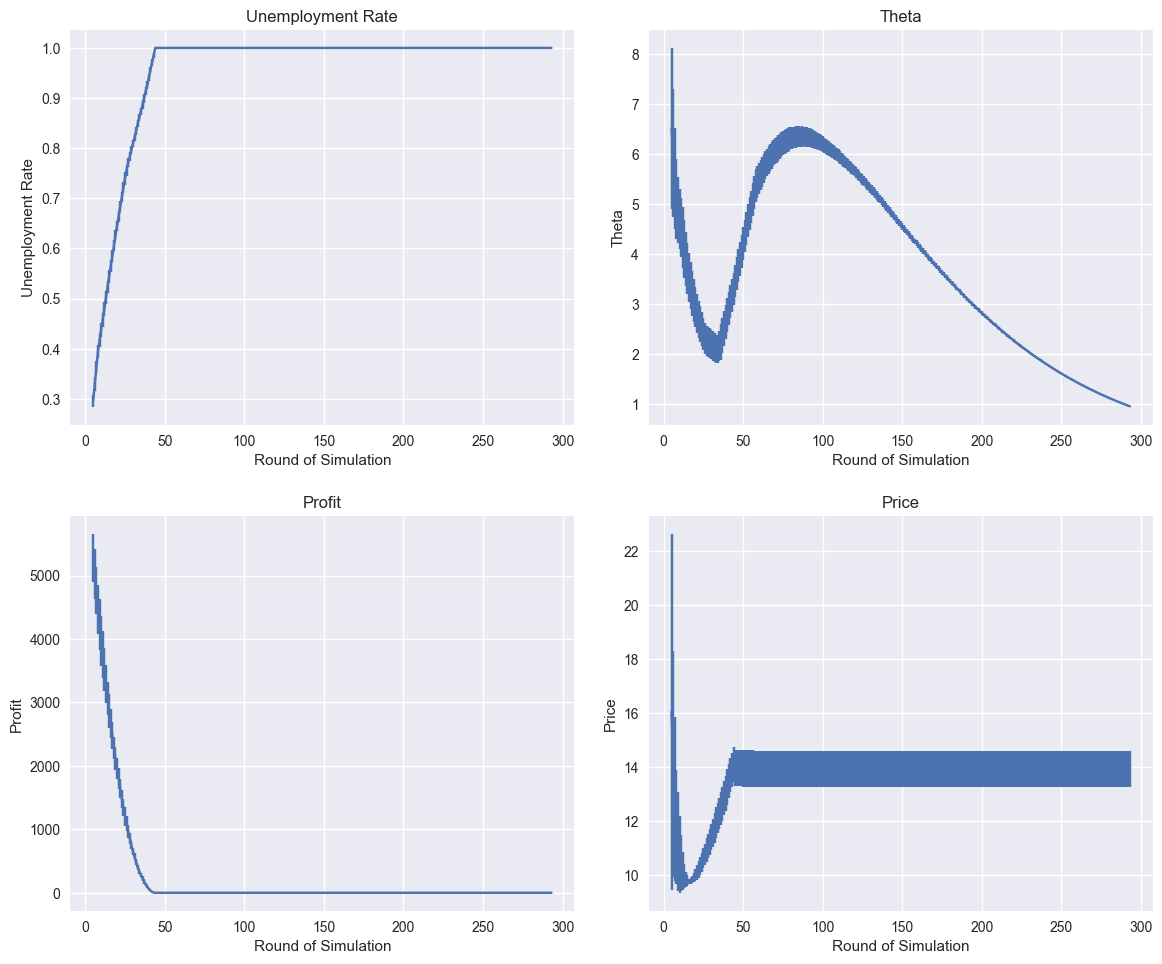

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the file paths
file_paths = {
    "unemployment_rate": r"C:\\Users\\enmao\\OneDrive-CU\\mas thesis\\code\\extracted_unemployment_rate.csv",
    "theta": r"C:\\Users\\enmao\\OneDrive-CU\\mas thesis\\code\\extracted_theta.csv",
    "Revenue": r"C:\\Users\\enmao\\OneDrive-CU\\mas thesis\\code\\extracted_profit.csv",
    "price": r"C:\\Users\\enmao\\OneDrive-CU\\mas thesis\\code\\extracted_price.csv"
}

# Define a function to calculate the mean and standard deviation per row
def calculate_mean_std(file_name):
    # Load the data
    df = pd.read_csv(file_paths[file_name])
    
    # Calculate the mean and standard deviation for each row
    # skip the first 4 rows
    # means = df.mean(axis=1)
    # std_devs = df.std(axis=1)
    means = df.iloc[11:].mean(axis=1)
    std_devs = df.iloc[11:].std(axis=1)
    
    return means, std_devs

# Plot confidence intervals (mean with error bars)
def plot_confidence_intervals(ax, data, title, xlabel, ylabel):
    means, std_devs = data
    row_indices = range(5, len(means)+5)
    
    #ax.errorbar(row_indices, means, yerr=std_devs, fmt='-o', capsize=5, label='Mean with Std Dev')
    ax.errorbar(row_indices, means, yerr=std_devs, capsize=5, label='Mean with Std Dev')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

# Create the 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Unemployment Rate subplot
mean_ur, std_ur = calculate_mean_std('unemployment_rate')
plot_confidence_intervals(axs[0, 0], (mean_ur, std_ur), 'Unemployment Rate', 'Round of Simulation', 'Unemployment Rate')

# Theta subplot
mean_theta, std_theta = calculate_mean_std('theta')
plot_confidence_intervals(axs[0, 1], (mean_theta, std_theta), 'Theta', 'Round of Simulation', 'Theta')

# Revenue subplot
mean_Revenue, std_Revenue = calculate_mean_std('Revenue')
plot_confidence_intervals(axs[1, 0], (mean_Revenue, std_Revenue), 'Revenue', 'Round of Simulation', 'Revenue')

# Price subplot
mean_price, std_price = calculate_mean_std('price')
plot_confidence_intervals(axs[1, 1], (mean_price, std_price), 'Price', 'Round of Simulation', 'Price')

# Adjust layout and show the plot
fig.tight_layout(pad=2.0)
plt.show()
fig.savefig(r'C:\Users\enmao\OneDrive-CU\mas thesis\confident_interval.png')

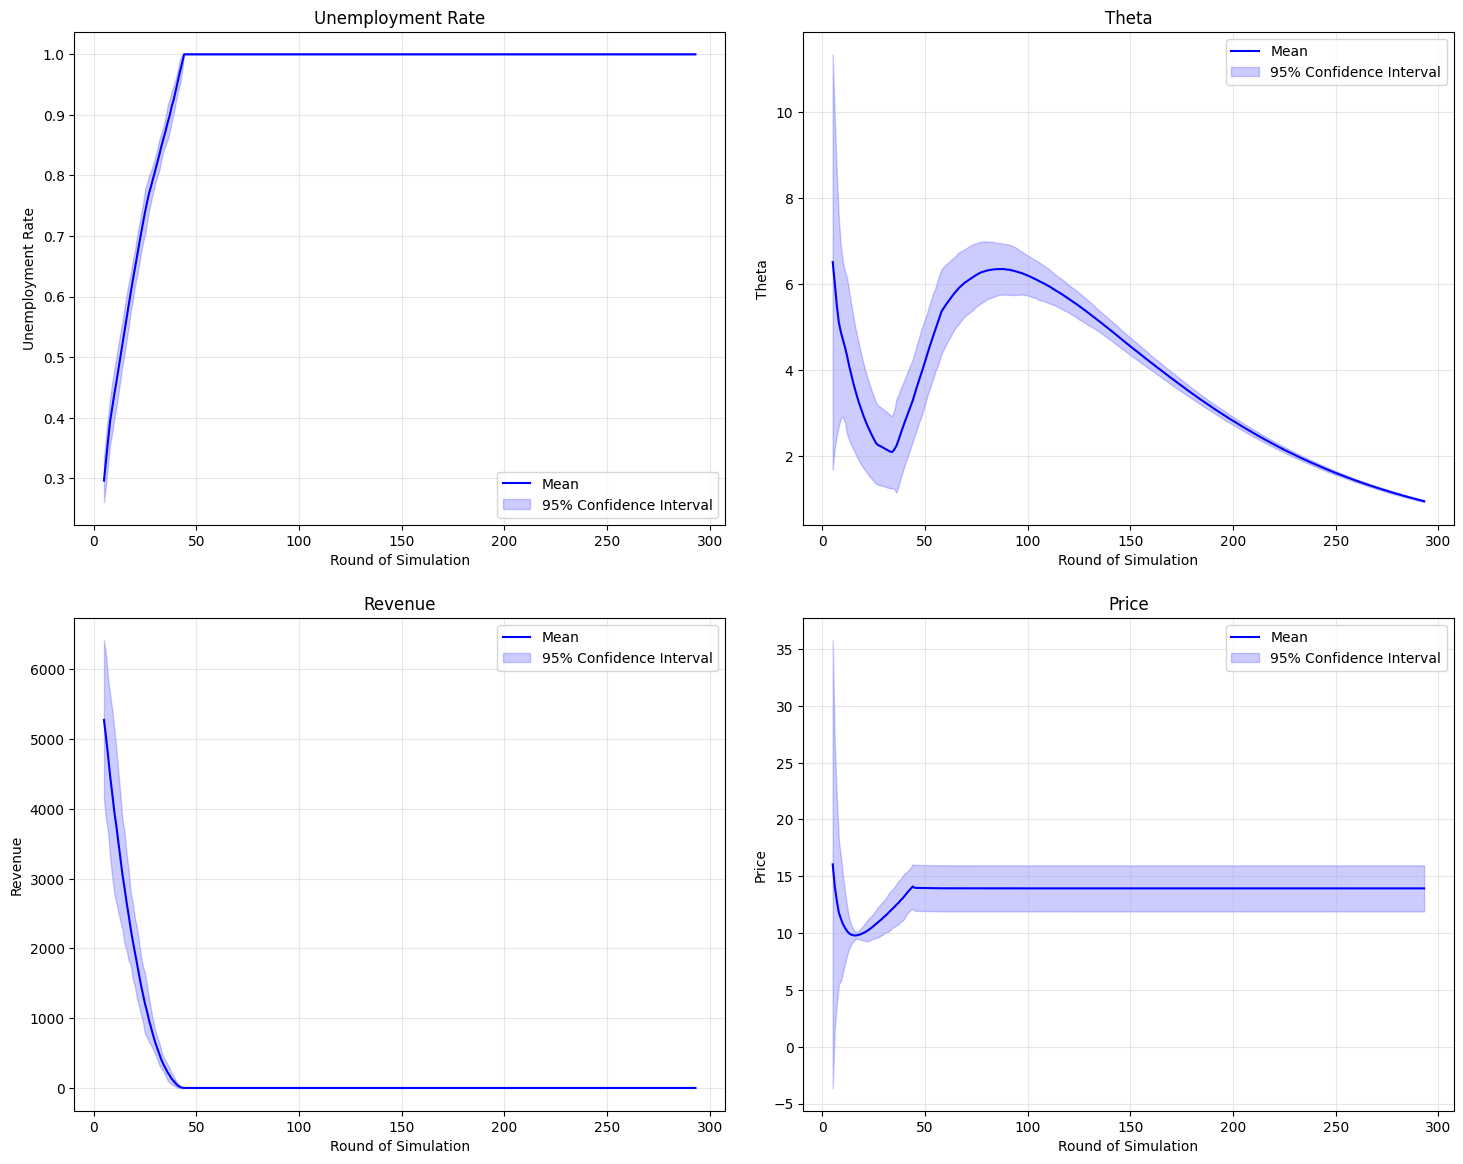

In [3]:
# num_firm = 50
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the file paths
file_paths = {
    "unemployment_rate": r"D:\mas\code\extracted_unemployment_rate_50.csv",
    "theta": r"C:\Users\enmao\OneDrive-CU\mas thesis\code\extracted_theta.csv",
    "Revenue": r"C:\Users\enmao\OneDrive-CU\mas thesis\code\extracted_profit.csv",
    "price": r"C:\Users\enmao\OneDrive-CU\mas thesis\code\extracted_price.csv"
}

def calculate_mean_std(file_name):
    df = pd.read_csv(file_paths[file_name])
    means = df.iloc[11:].mean(axis=1)
    std_devs = df.iloc[11:].std(axis=1)
    return means, std_devs

def plot_confidence_intervals(ax, data, title, xlabel, ylabel):
    means, std_devs = data
    row_indices = range(5, len(means) + 5)
    
    # Plot mean line
    ax.plot(row_indices, means, '-', color='blue', label='Mean')
    
    # Add shaded confidence interval
    ax.fill_between(row_indices, 
                    means - 3*std_devs, 
                    means + 3*std_devs, 
                    color='blue', 
                    alpha=0.2, 
                    label='95% Confidence Interval')
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create the 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot each variable
variables = {
    (0, 0): ('unemployment_rate', 'Unemployment Rate'),
    (0, 1): ('theta', 'Theta'),
    (1, 0): ('Revenue', 'Revenue'),
    (1, 1): ('price', 'Price')
}

for (row, col), (var_key, var_title) in variables.items():
    mean_data, std_data = calculate_mean_std(var_key)
    plot_confidence_intervals(axs[row, col], 
                             (mean_data, std_data), 
                             var_title, 
                             'Round of Simulation', 
                             var_title)

# Adjust layout and save the plot
plt.tight_layout(pad=2.0)
plt.savefig(r'C:\Users\enmao\OneDrive-CU\mas thesis\confident_interval.png', dpi=300)
plt.show()

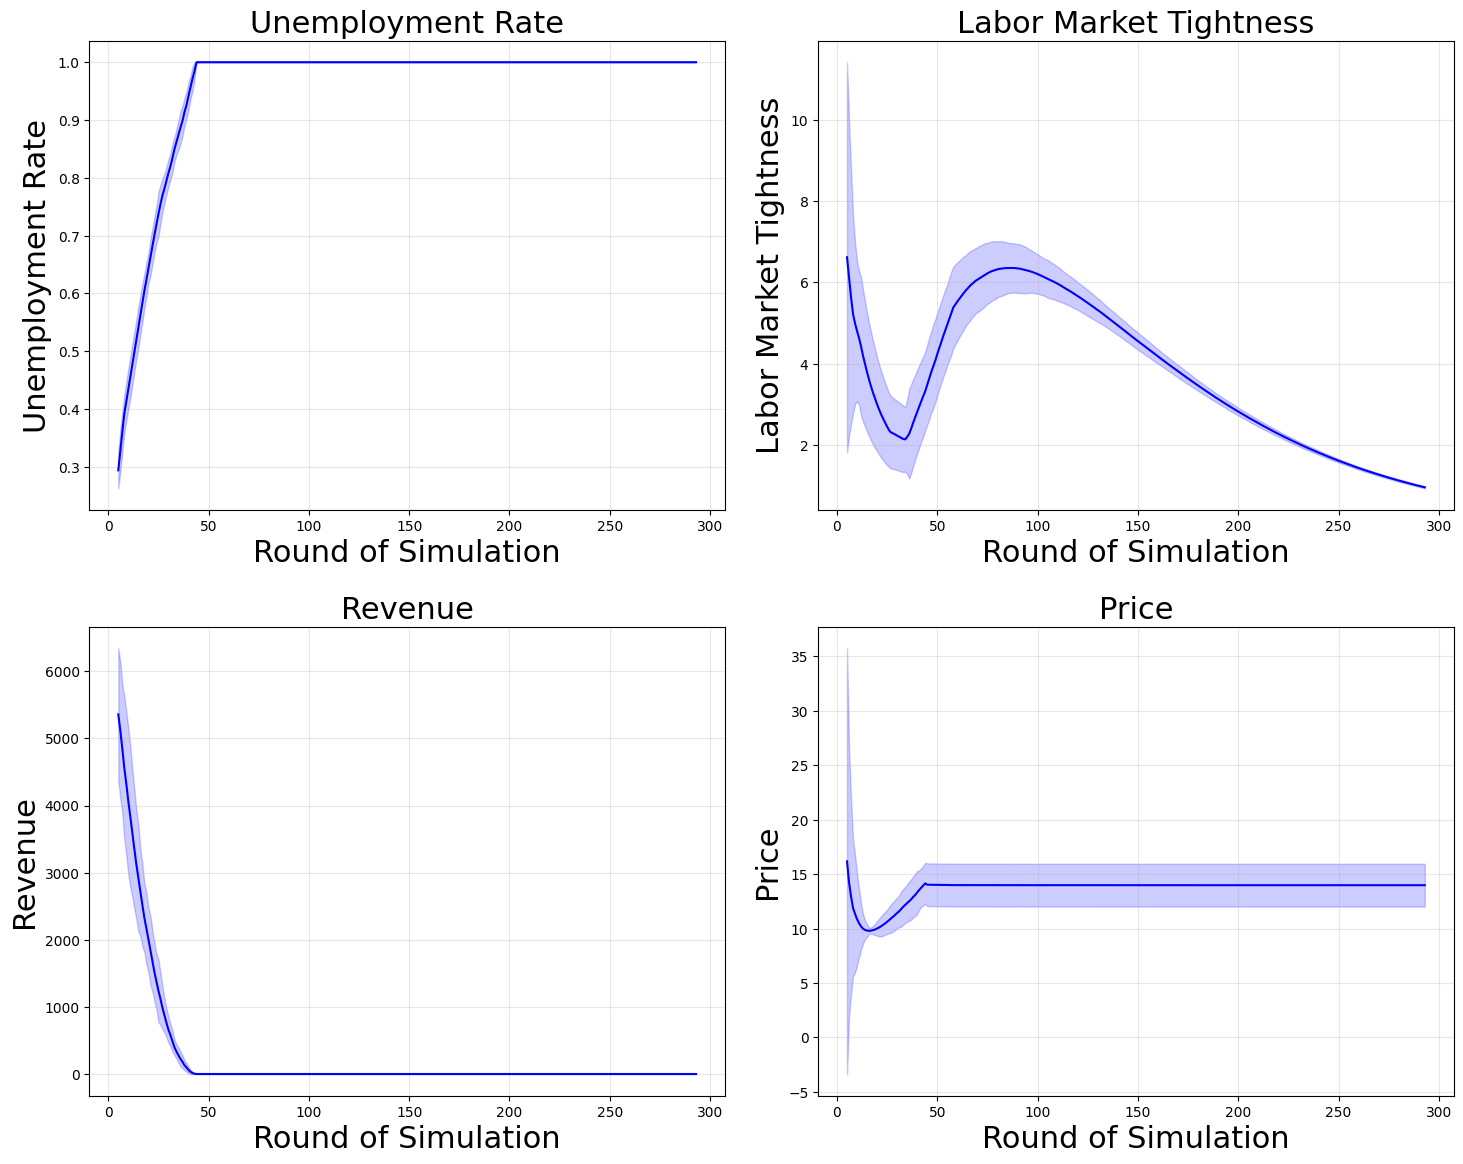

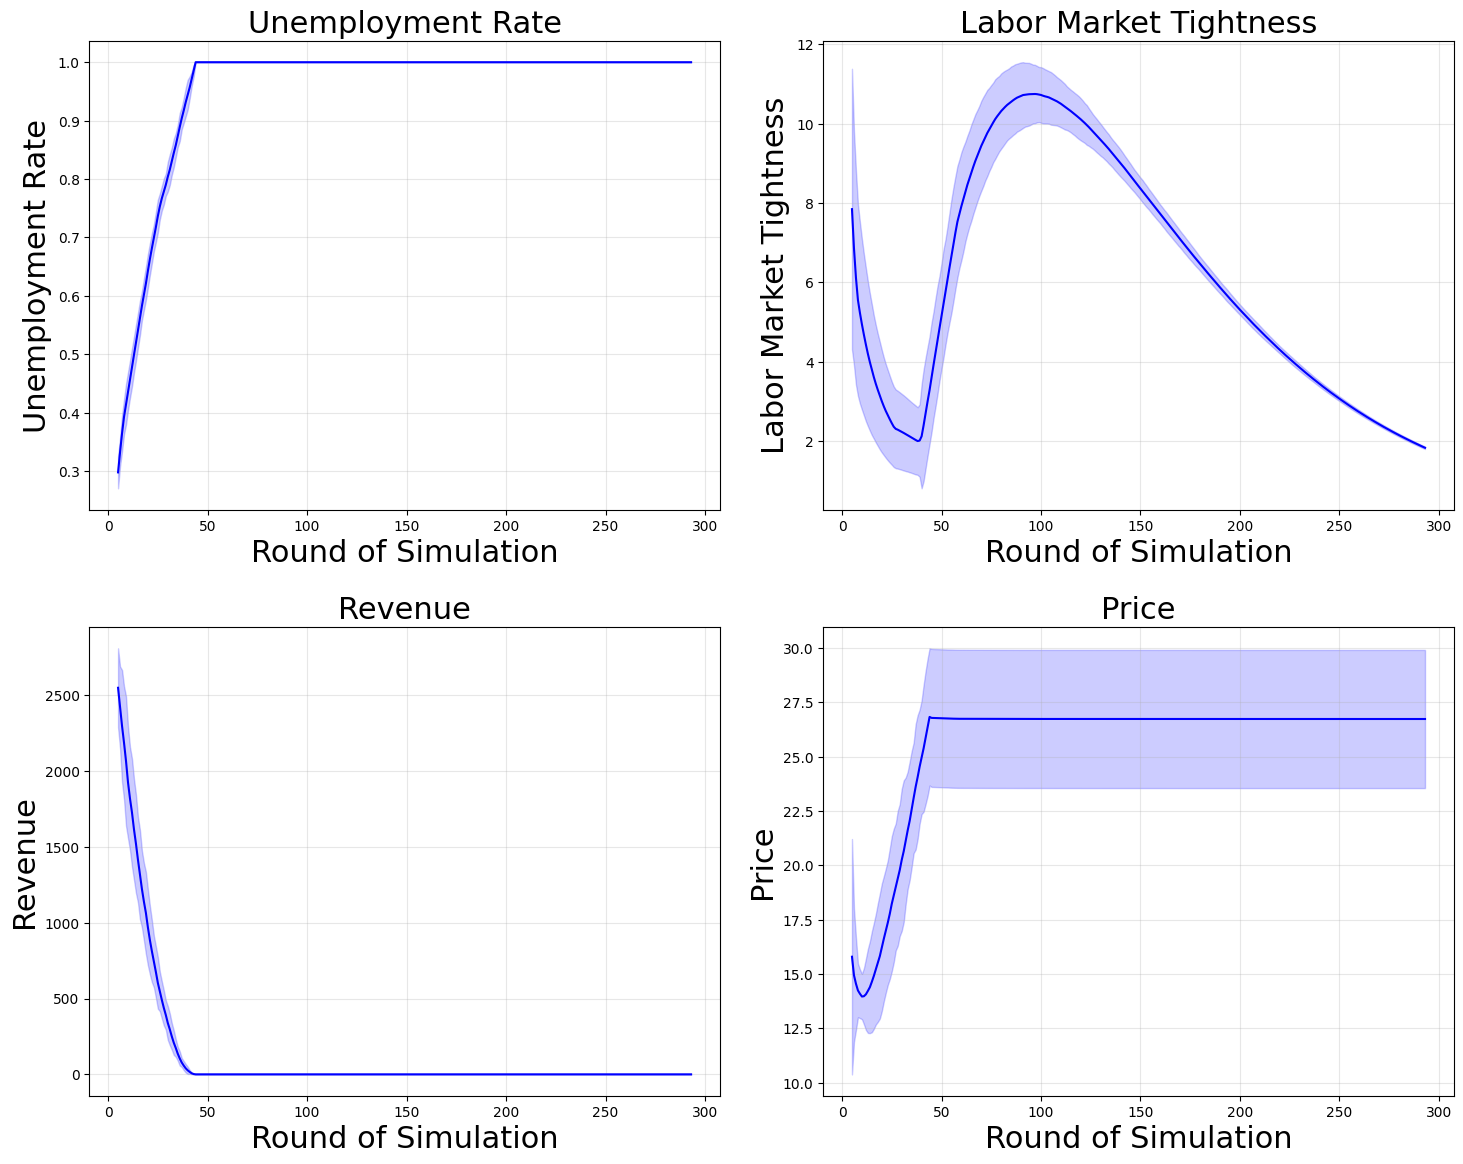

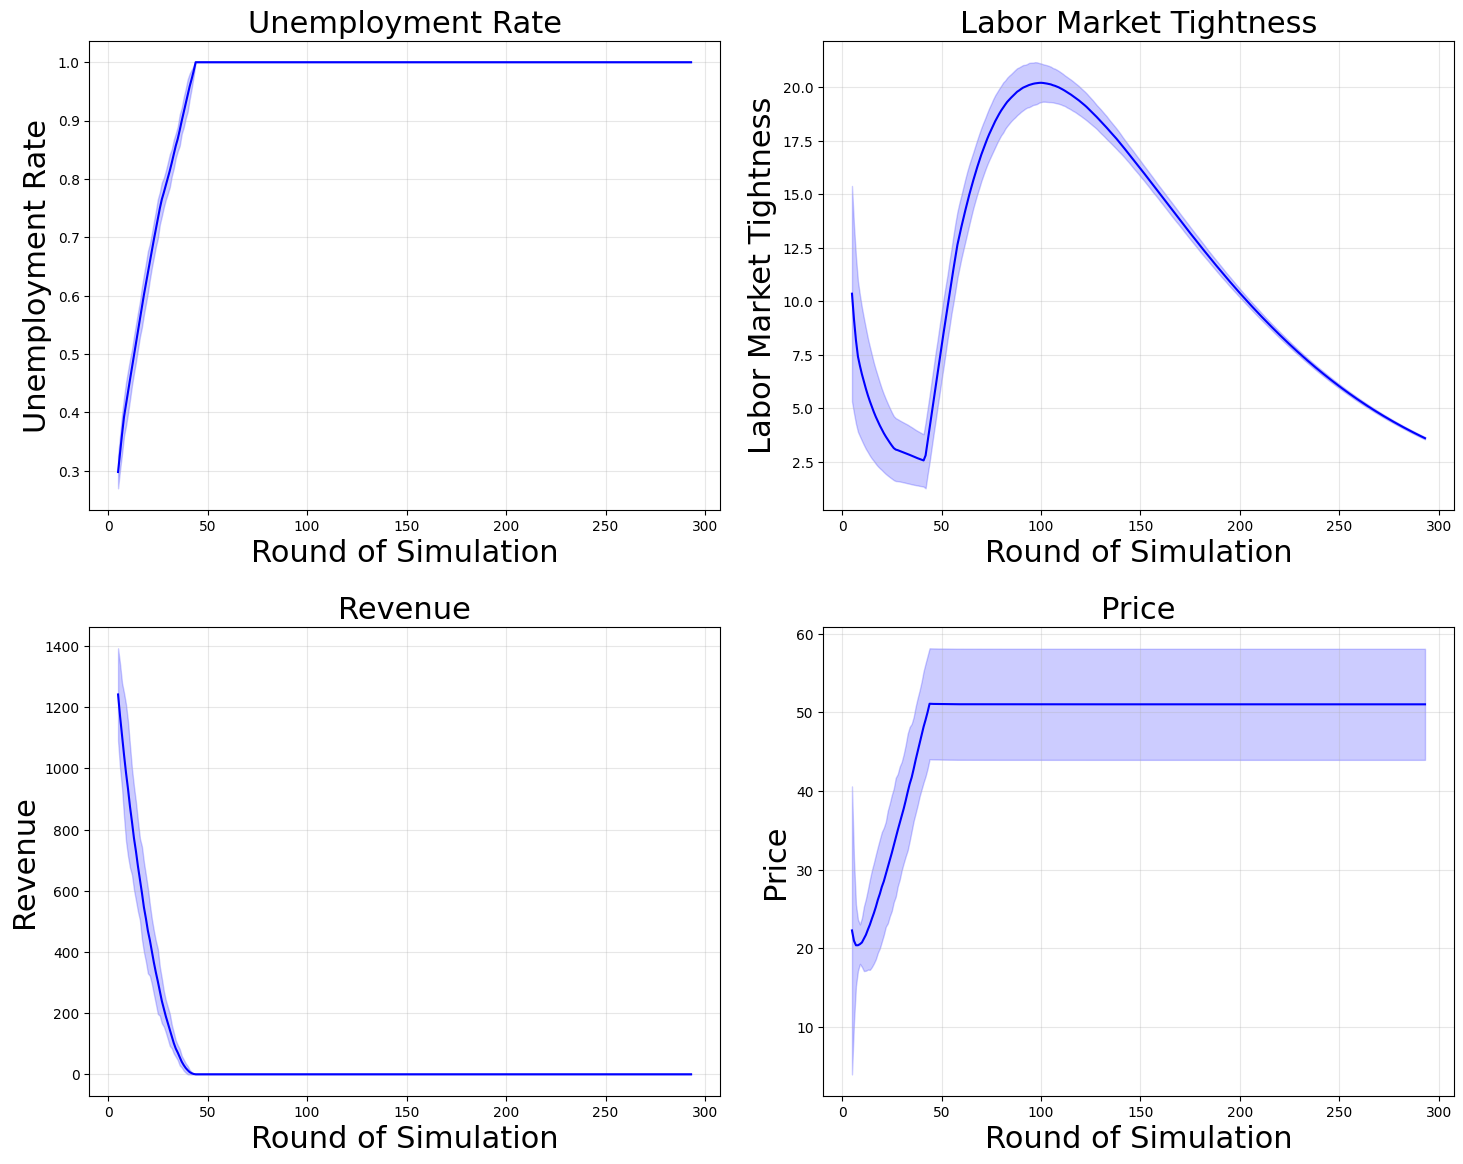

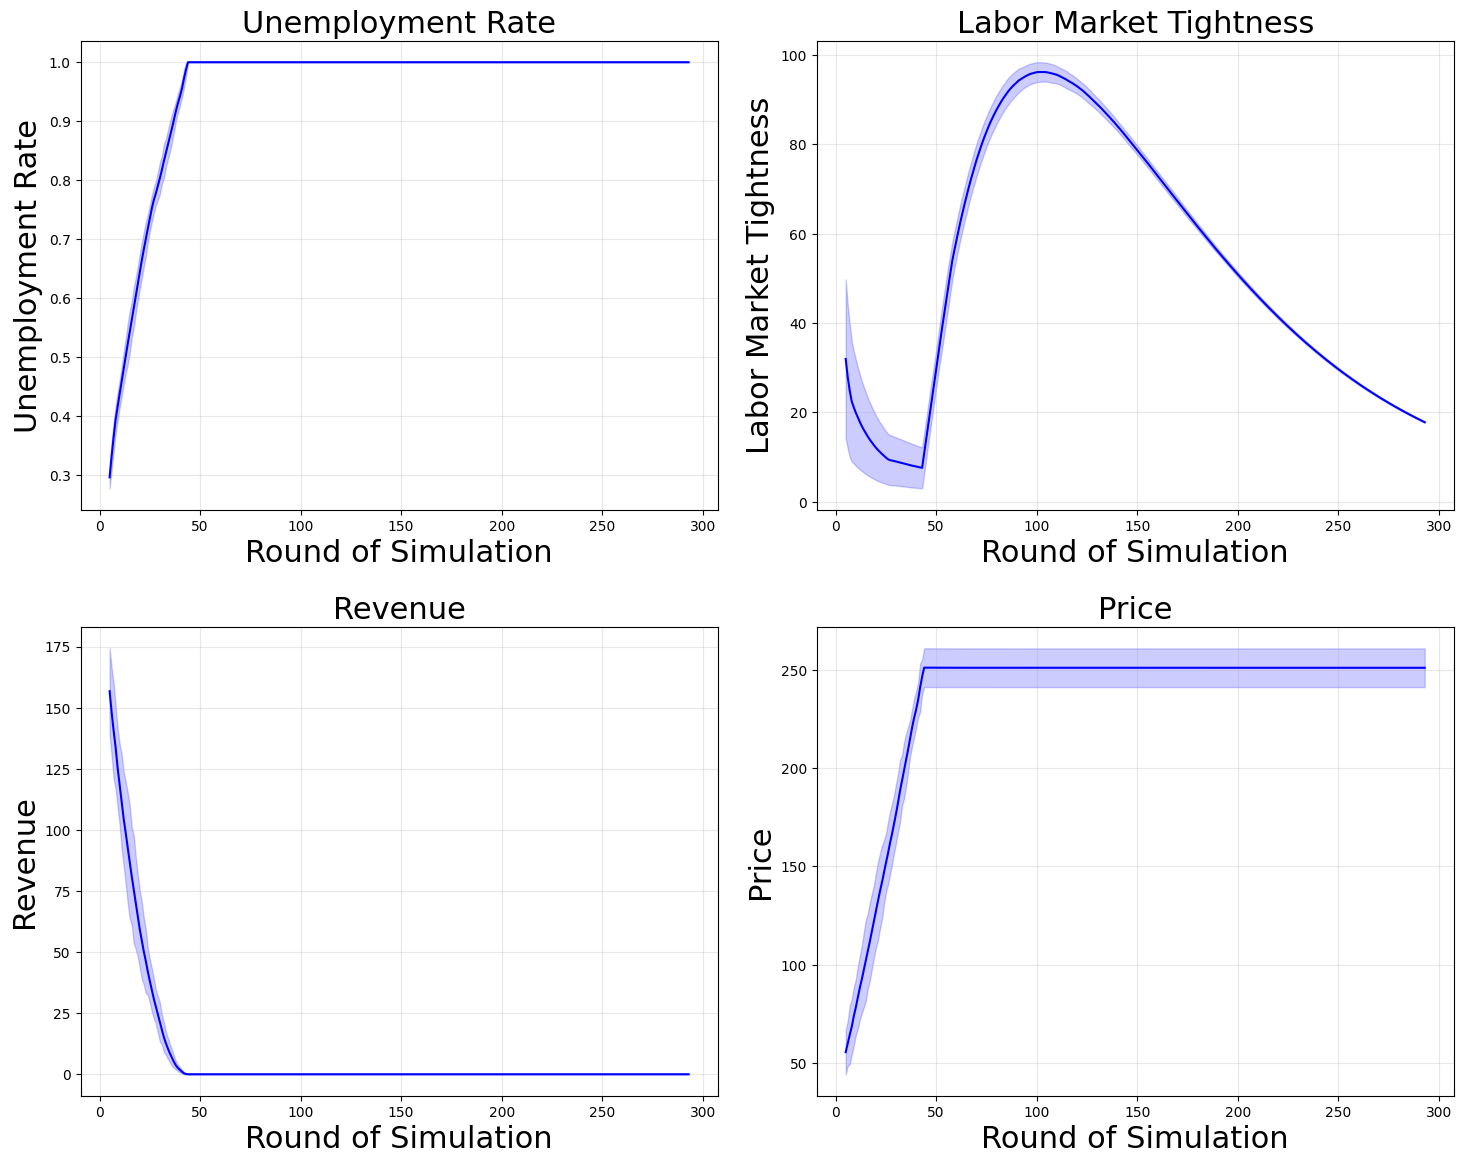

In [8]:
# 6am, Oct. 06, 2024
# num_firm = 50

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FIRM_SIZES = [50, 100, 200, 1000]
for firm in FIRM_SIZES:
    # Define the file paths
    file_paths = {
        "unemployment_rate": f"D:\mas\code\extracted_unemployment_rate_{firm}.csv",
        "theta": f"D:\mas\code\extracted_theta_{firm}.csv",
        "Revenue": f"D:\mas\code\extracted_revenue_{firm}.csv",
        "price": f"D:\mas\code\extracted_price_{firm}.csv"
    }

    def calculate_mean_std(file_name):
        df = pd.read_csv(file_paths[file_name])
        means = df.iloc[11:].mean(axis=1)
        std_devs = df.iloc[11:].std(axis=1)
        return means, std_devs

    def plot_confidence_intervals(ax, data, title, xlabel, ylabel):
        means, std_devs = data
        row_indices = range(5, len(means) + 5)

        # Plot mean line
        ax.plot(row_indices, means, '-', color='blue', label='Mean')

        # Add shaded confidence interval
        ax.fill_between(row_indices, 
                        means - 3*std_devs, 
                        means + 3*std_devs, 
                        color='blue', 
                        alpha=0.2, 
                        label='95% Confidence Interval')

        ax.set_title(title, fontsize=22)
        ax.set_xlabel(xlabel, fontsize=22)
        ax.set_ylabel(ylabel, fontsize=22)
        ax.grid(True, alpha=0.3)
        #ax.legend(fontsize=22)

    # Create the 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))

    # Plot each variable
    variables = {
        (0, 0): ('unemployment_rate', 'Unemployment Rate'),
        (0, 1): ('theta', 'Labor Market Tightness'),
        (1, 0): ('Revenue', 'Revenue'),
        (1, 1): ('price', 'Price')
    }

    for (row, col), (var_key, var_title) in variables.items():
        mean_data, std_data = calculate_mean_std(var_key)
        plot_confidence_intervals(axs[row, col], 
                                 (mean_data, std_data), 
                                 var_title, 
                                 'Round of Simulation', 
                                 var_title)

    # Adjust layout and save the plot
    plt.tight_layout(pad=2.0)
    plt.savefig(f'D:\mas\code\confident_interval_{firm}.png', dpi=300)
    plt.show()

C:\Users\enmao\AppData\Local\Temp\ipykernel_14200\4280793628.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


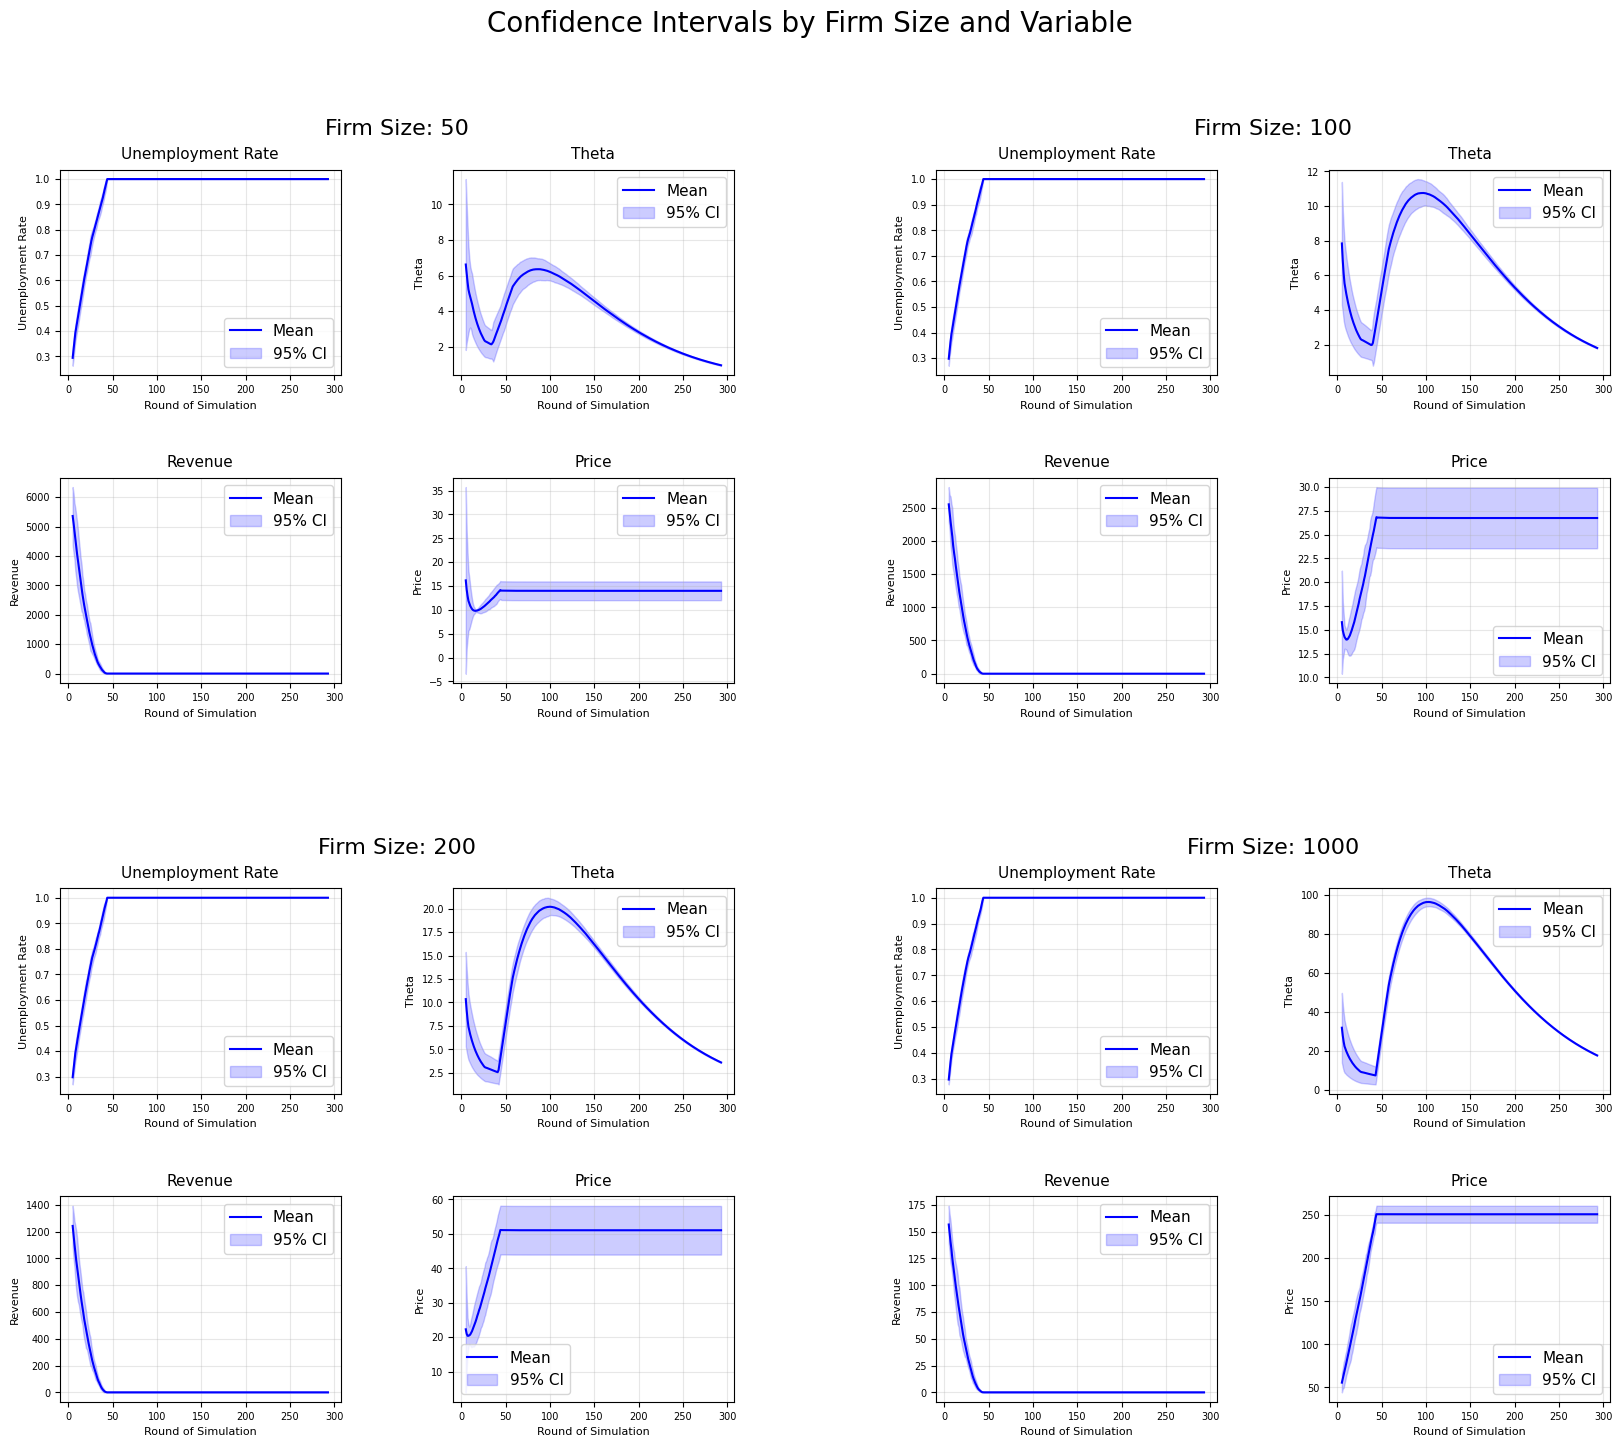

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define constants
FIRM_SIZES = [50, 100, 200, 1000]
VARIABLES = {
    "unemployment_rate": "Unemployment Rate",
    "theta": "Theta",
    "revenue": "Revenue",
    "price": "Price"
}
BASE_PATH = r"D:\mas\code"

def calculate_mean_std(file_path):
    df = pd.read_csv(file_path)
    means = df.iloc[11:].mean(axis=1)
    std_devs = df.iloc[11:].std(axis=1)
    return means, std_devs

def plot_confidence_interval(ax, data, title, ylabel):
    means, std_devs = data
    row_indices = range(5, len(means) + 5)
    
    ax.plot(row_indices, means, '-', color='blue', label='Mean')
    ax.fill_between(row_indices, 
                    means - 3*std_devs, 
                    means + 3*std_devs, 
                    color='blue', 
                    alpha=0.2, 
                    label='95% CI')
    
    ax.set_title(title, fontsize=11, pad=8)
    ax.set_xlabel('Round of Simulation', fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=11)

# Create the main figure
fig = plt.figure(figsize=(20, 16))

# Create outer grid with spacing
outer_grid = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

# Iterate over firm sizes for outer grid
for i, firm_size in enumerate(FIRM_SIZES):
    outer_row, outer_col = i // 2, i % 2
    
    # Create nested gridspec for each firm size with improved spacing
    inner_grid = outer_grid[outer_row, outer_col].subgridspec(2, 2, hspace=0.5, wspace=0.4)
    
    # Add a title for each firm size subplot
    fig.add_subplot(outer_grid[outer_row, outer_col])
    plt.title(f'Firm Size: {firm_size}', fontsize=16, pad=25)
    plt.axis('off')
    
    # Iterate over variables for inner grid
    for j, (var_key, var_title) in enumerate(VARIABLES.items()):
        inner_row, inner_col = j // 2, j % 2
        
        # Create subplot
        ax = fig.add_subplot(inner_grid[inner_row, inner_col])
        
        # Calculate data and plot
        file_path = f"{BASE_PATH}/extracted_{var_key}_{firm_size}.csv"
        try:
            data = calculate_mean_std(file_path)
            plot_confidence_interval(ax, data, var_title, var_title)
        except FileNotFoundError:
            ax.text(0.5, 0.5, f"File not found:\n{file_path}", 
                   ha='center', va='center', fontsize=8)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add overall title
fig.suptitle('Confidence Intervals by Firm Size and Variable', fontsize=20, y=0.98)

plt.savefig(f"{BASE_PATH}/nested_confidence_intervals.png", dpi=600, bbox_inches='tight')
plt.show()